In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [2]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [3]:
# Load the dataset
df = pd.read_csv('diabetes.csv')


In [4]:
# Display the first few rows
print("Dataset Head:")
print(df.head())


Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Print dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
# Check for missing values
print("\nMissing Values Per Column:")
df.isnull().sum()


Missing Values Per Column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


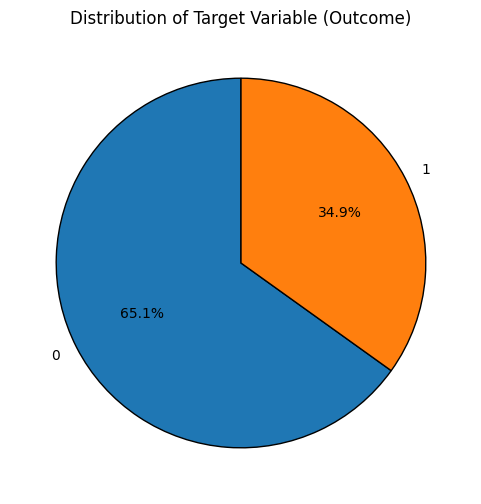

In [7]:
# Plotting the distribution of the target variable using a pie chart
outcome_counts = df['Outcome'].value_counts()
labels = outcome_counts.index
sizes = outcome_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Target Variable (Outcome)')
plt.show()

In [8]:
# Replace zero values in certain columns with NaN
columns_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zero_values] = df[columns_with_zero_values].replace(0, np.nan)

# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [9]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [10]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_resampled)

# Normalize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [12]:
# Initialize and train a Gradient Boosting Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}



Accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        99
           1       0.78      0.89      0.83       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



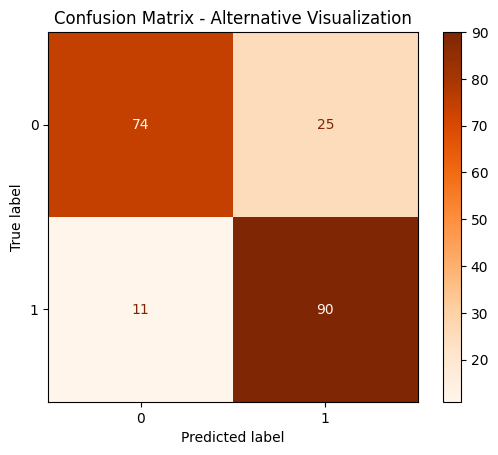

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Predict and evaluate the model
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix using an alternative visualization
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=set(y_test))
disp.plot(cmap='Oranges', colorbar=True)
plt.title("Confusion Matrix - Alternative Visualization")
plt.show()
